# Jupyter notebook


In [2]:
%pip install  matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 11.8 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 15.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 15.8 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 17.6 MB/s eta 0:00:00
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   --------------------- ------------------ 3.7/7.0 MB 19.3 MB/s eta 0:00:01
   ---------------------------------------- 7.0/7.0 MB 17.4 MB/s eta 0:00:00
Using ca


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
%pip install numpy

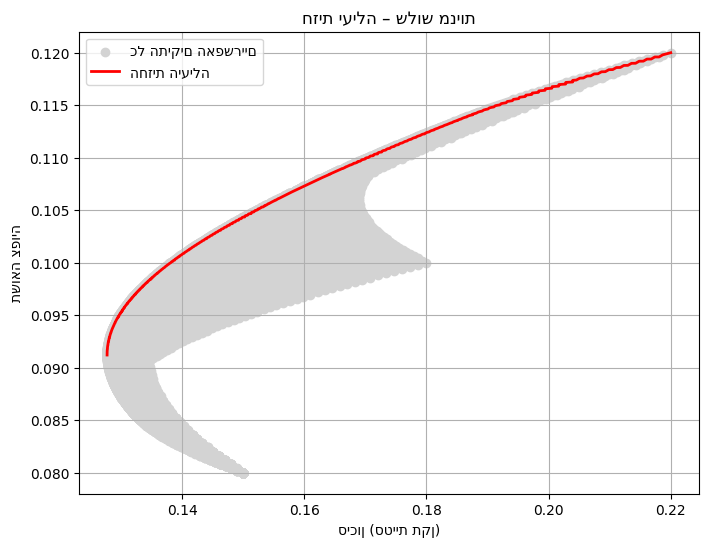

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# נתונים
returns = np.array([0.08, 0.10, 0.12])  # תשואה צפויה
std_devs = np.array([0.15, 0.18, 0.22])  # סטיות תקן
corr_matrix = np.array([[1.00, 0.30, 0.20], [0.30, 1.00, 0.50], [0.20, 0.50, 1.00]])

# מטריצת קווריאנצה
cov_matrix = np.outer(std_devs, std_devs) * corr_matrix

# יצירת קומבינציות משקלים
weights_list = []
port_returns = []
port_risks = []

for w1 in np.linspace(0, 1, 100):
    for w2 in np.linspace(0, 1 - w1, 100):
        w3 = 1 - w1 - w2
        weights = np.array([w1, w2, w3])
        port_return = np.dot(weights, returns)
        port_var = np.dot(weights.T, np.dot(cov_matrix, weights))
        port_std = np.sqrt(port_var)

        weights_list.append(weights)
        port_returns.append(port_return)
        port_risks.append(port_std)

port_returns = np.array(port_returns)
port_risks = np.array(port_risks)

# מציאת החזית היעילה
efficient_idx = np.argsort(port_risks)
efficient_frontier_risks = []
efficient_frontier_returns = []
max_return = -np.inf

for idx in efficient_idx:
    if port_returns[idx] > max_return:
        max_return = port_returns[idx]
        efficient_frontier_risks.append(port_risks[idx])
        efficient_frontier_returns.append(port_returns[idx])

# גרף
plt.figure(figsize=(8, 6))
plt.scatter(port_risks, port_returns, c="lightgray", label="כל התיקים האפשריים")
plt.plot(
    efficient_frontier_risks,
    efficient_frontier_returns,
    "r-",
    linewidth=2,
    label="החזית היעילה",
)
plt.xlabel("סיכון (סטיית תקן)")
plt.ylabel("תשואה צפויה")
plt.title("חזית יעילה – שלוש מניות")
plt.legend()
plt.grid(True)
plt.show()

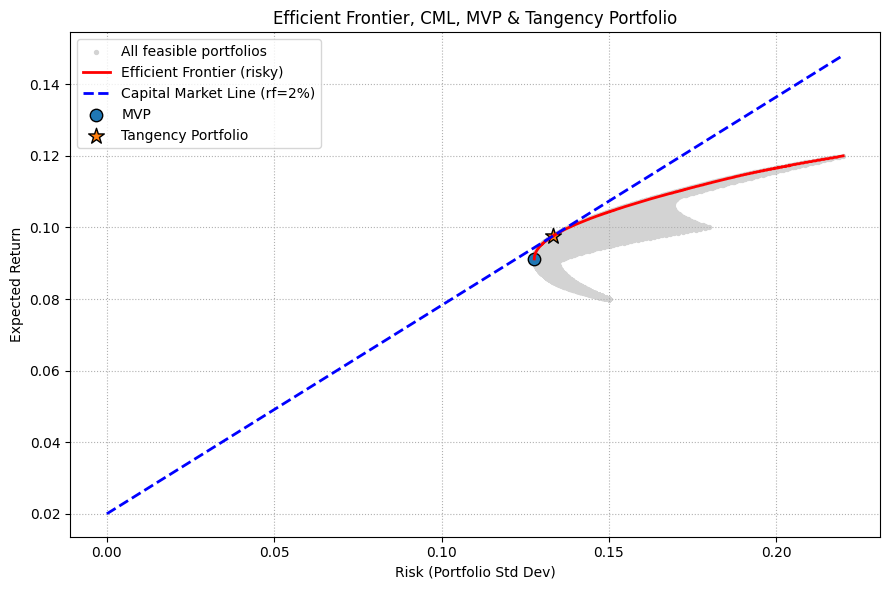

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# === Inputs ===
# Expected returns and volatilities (standard deviations)
returns = np.array([0.08, 0.10, 0.12])
std_devs = np.array([0.15, 0.18, 0.22])

# Correlation matrix between the assets
corr_matrix = np.array([[1.00, 0.30, 0.20], [0.30, 1.00, 0.50], [0.20, 0.50, 1.00]])

# Risk-free rate (for CML and tangency portfolio)
rf = 0.02  # 2%

# === Covariance matrix ===
# Cov = D_sigma * Corr * D_sigma, here via outer product
cov_matrix = np.outer(std_devs, std_devs) * corr_matrix

# === Generate long-only weight combinations (w1 + w2 + w3 = 1) ===
weights_list = []
port_returns = []
port_risks = []

for w1 in np.linspace(0, 1, 100):
    for w2 in np.linspace(0, 1 - w1, 100):
        w3 = 1 - w1 - w2
        weights = np.array([w1, w2, w3])
        # Portfolio return and standard deviation
        p_ret = np.dot(weights, returns)
        p_var = np.dot(weights.T, np.dot(cov_matrix, weights))
        p_std = np.sqrt(p_var)

        weights_list.append(weights)
        port_returns.append(p_ret)
        port_risks.append(p_std)

weights = np.array(weights_list)
port_returns = np.array(port_returns)
port_risks = np.array(port_risks)

# === Efficient frontier (upper envelope by return for each risk) ===
# Sort by risk and keep points that improve max return seen so far
order = np.argsort(port_risks)
eff_risks, eff_returns = [], []
max_ret_so_far = -np.inf
for idx in order:
    if port_returns[idx] > max_ret_so_far:
        max_ret_so_far = port_returns[idx]
        eff_risks.append(port_risks[idx])
        eff_returns.append(port_returns[idx])

eff_risks = np.array(eff_risks)
eff_returns = np.array(eff_returns)

# === Minimum-Variance Portfolio (MVP) ===
idx_mvp = np.argmin(port_risks)
risk_mvp = port_risks[idx_mvp]
ret_mvp = port_returns[idx_mvp]
w_mvp = weights[idx_mvp]

# === Tangency Portfolio (max Sharpe ratio vs. rf) ===
# Avoid division by zero in Sharpe
eps = 1e-12
sharpes = (port_returns - rf) / np.maximum(port_risks, eps)
idx_tan = np.argmax(sharpes)
risk_tan = port_risks[idx_tan]
ret_tan = port_returns[idx_tan]
w_tan = weights[idx_tan]

# === Capital Market Line (CML) ===
# Line from (0, rf) to the tangency portfolio
slope = (ret_tan - rf) / risk_tan
risk_line = np.linspace(0.0, port_risks.max(), 200)
ret_line = rf + slope * risk_line

# === Plot ===
plt.figure(figsize=(9, 6))

# All feasible portfolios
plt.scatter(
    port_risks, port_returns, s=8, c="lightgray", label="All feasible portfolios"
)

# Efficient frontier (risky assets only)
plt.plot(eff_risks, eff_returns, "r-", linewidth=2, label="Efficient Frontier (risky)")

# Capital Market Line
plt.plot(risk_line, ret_line, "b--", linewidth=2, label="Capital Market Line (rf=2%)")

# Mark MVP and Tangency points
plt.scatter([risk_mvp], [ret_mvp], marker="o", s=80, edgecolors="k", label="MVP")
plt.scatter(
    [risk_tan], [ret_tan], marker="*", s=140, edgecolors="k", label="Tangency Portfolio"
)

# Labels and aesthetics
plt.xlabel("Risk (Portfolio Std Dev)")
plt.ylabel("Expected Return")
plt.title("Efficient Frontier, CML, MVP & Tangency Portfolio")
plt.legend()
plt.grid(True, linestyle=":")
plt.tight_layout()
plt.show()

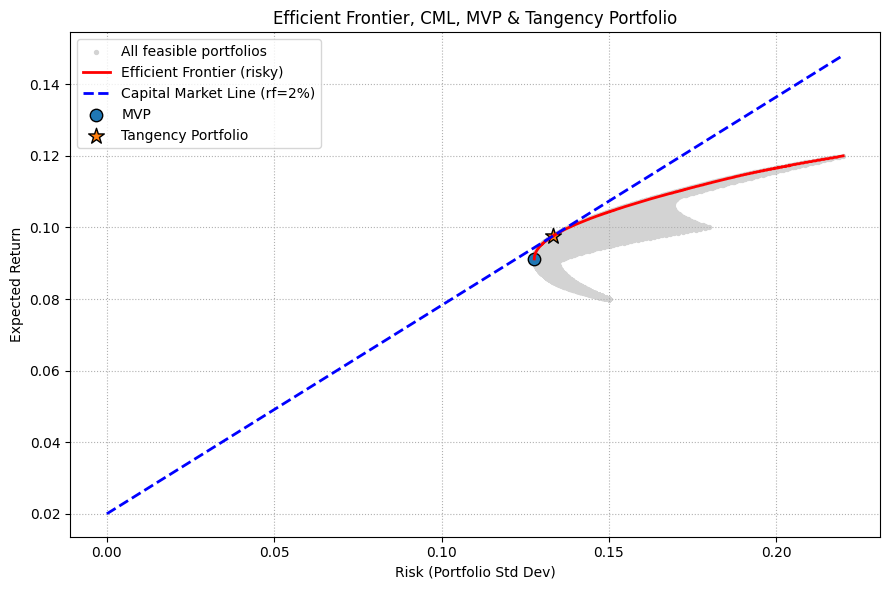

In [9]:
plt.figure(figsize=(9, 6))
plt.scatter(port_risks, port_returns, s=8, c='lightgray', label='All feasible portfolios')
plt.plot(eff_risks, eff_returns, 'r-', linewidth=2, label='Efficient Frontier (risky)')
plt.plot(risk_line, ret_line, 'b--', linewidth=2, label='Capital Market Line (rf=2%)')
plt.scatter([risk_mvp], [ret_mvp], marker='o', s=80, edgecolors='k', label='MVP')
plt.scatter([risk_tan], [ret_tan], marker='*', s=140, edgecolors='k', label='Tangency Portfolio')
plt.xlabel('Risk (Portfolio Std Dev)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier, CML, MVP & Tangency Portfolio')
plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()

# Save as SVG (vector graphic)
plt.savefig('efficient_frontier.svg', format='svg')

# Optional: also save as PDF
# plt.savefig('efficient_frontier.pdf', format='pdf')

plt.show()
 

#This way you get a **vector-based file** that can be scaled infinitely without losing quality, which is ideal for publications or embedding in LaTeX/Markdown documents.